# Importing Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump


# Importing Dataset

In [2]:
df = pd.read_csv("heart_disease_data.csv")
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


# Data Preprocessing

In [3]:
# See features before label encoding
print(X)


[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]


In [4]:
# For text columns
le1 = LabelEncoder() # Sex
le2 = LabelEncoder() # Chest Pain
le6 = LabelEncoder() # Resting ECG
le8 = LabelEncoder() # Exercise Angina 
le10 = LabelEncoder() # ST Slope

# Apply label encoding
X[:,1] = le1.fit_transform(X[:,1])
X[:,2] = le2.fit_transform(X[:,2])
X[:,6] = le6.fit_transform(X[:,6])
X[:,8] = le8.fit_transform(X[:,8])
X[:,10] = le10.fit_transform(X[:,10])


In [5]:
# Check features after label encoding
print(X)


[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


# Splitting Data into Training and Test Sets

In [6]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Feature Scaling

In [7]:
print(X_train)

[[70 1 0 ... 1 2.0 1]
 [46 1 0 ... 1 1.5 1]
 [65 0 2 ... 0 0.8 2]
 ...
 [57 0 0 ... 0 0.0 2]
 [64 1 0 ... 1 4.0 0]
 [47 1 2 ... 0 0.0 2]]


In [8]:
# Initiate instance of scaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
print(X_train)

[[ 1.75354017  0.51740017 -0.82686398 ...  1.19939076  1.0553738
  -0.59357258]
 [-0.81787111  0.51740017 -0.82686398 ...  1.19939076  0.57784676
  -0.59357258]
 [ 1.21782949 -1.93273999  1.27683849 ... -0.83375663 -0.0906911
   1.0443307 ]
 ...
 [ 0.3606924  -1.93273999 -0.82686398 ... -0.83375663 -0.85473437
   1.0443307 ]
 [ 1.11068735  0.51740017 -0.82686398 ...  1.19939076  2.96548197
  -2.23147586]
 [-0.71072897  0.51740017  1.27683849 ... -0.83375663 -0.85473437
   1.0443307 ]]


# Training Dataset

In [10]:
# Logistic Regression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)


LogisticRegression()

In [11]:
# SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)


SVC()

In [12]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=8)
model_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [13]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [15]:
y_pred_logistic = model_logistic.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_rf.predict(X_test)


# Evaluating Accuracy

In [16]:
Logistic_Acc = accuracy_score(y_true=y_test, y_pred=y_pred_logistic)
SVM_Acc = accuracy_score(y_true=y_test, y_pred=y_pred_svm)
KNN_Acc = accuracy_score(y_true=y_test, y_pred=y_pred_knn)
DT_Acc = accuracy_score(y_true=y_test, y_pred=y_pred_dt)
RF_Acc = accuracy_score(y_true=y_test, y_pred=y_pred_rf)


In [17]:
print(Logistic_Acc)
print(SVM_Acc)
print(KNN_Acc)
print(DT_Acc)
print(RF_Acc)


0.8369565217391305
0.8641304347826086
0.8478260869565217
0.7391304347826086
0.842391304347826


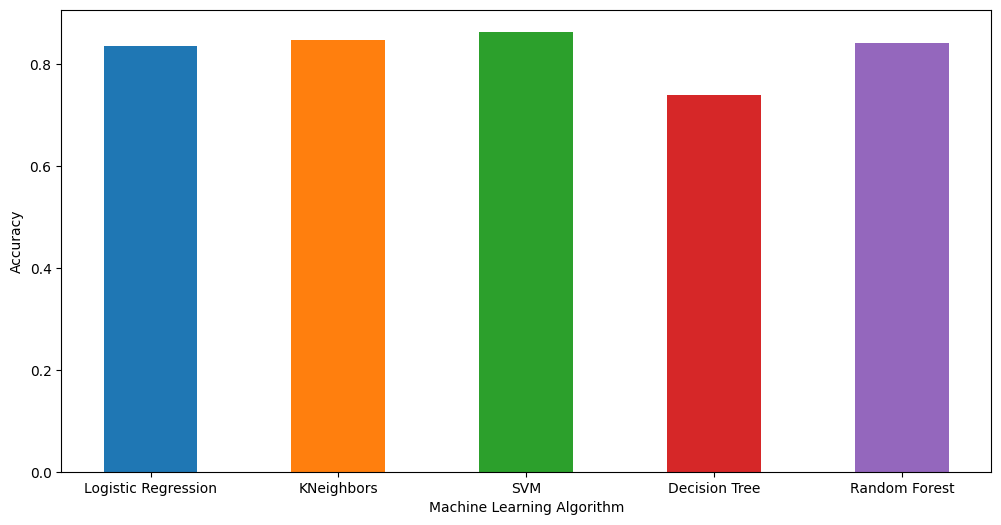

In [18]:
plt.figure(figsize=(12,6))
plt.bar("Logistic Regression", Logistic_Acc, width=0.5)
plt.bar("KNeighbors", KNN_Acc, width=0.5)
plt.bar("SVM", SVM_Acc, width=0.5)
plt.bar("Decision Tree", DT_Acc, width=0.5)
plt.bar("Random Forest", RF_Acc, width=0.5)
plt.xlabel('Machine Learning Algorithm')
plt.ylabel("Accuracy")
plt.show()


# Evaluating Classification Report

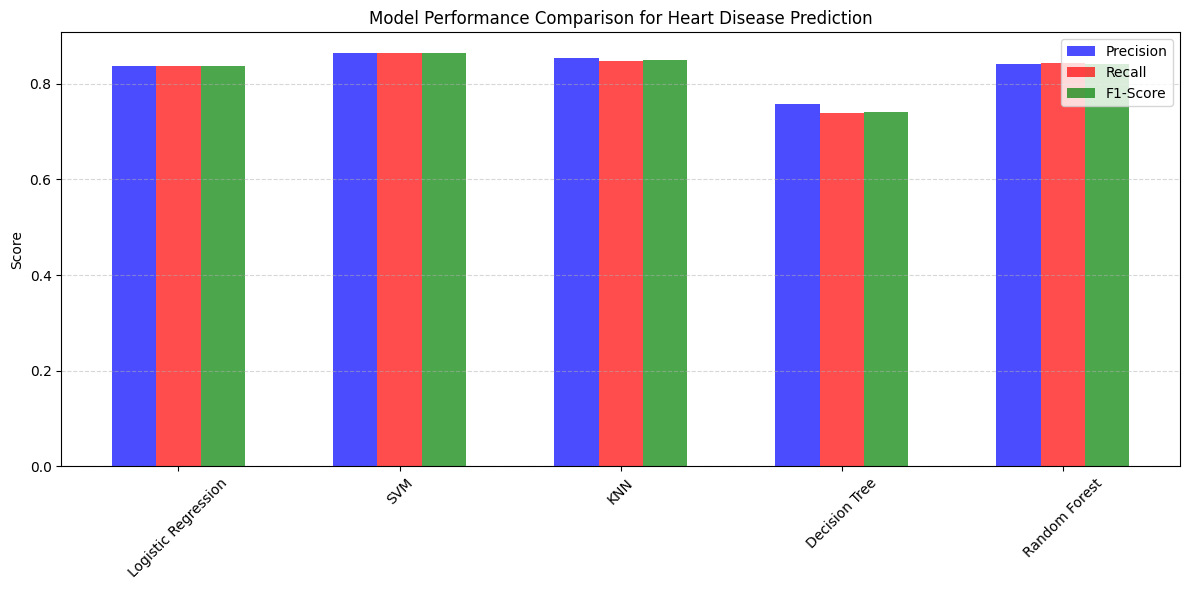

In [23]:
# Classification reports
Logistic_CR = classification_report(y_true=y_test, y_pred=y_pred_logistic, output_dict=True)
SVM_CR = classification_report(y_true=y_test, y_pred=y_pred_svm, output_dict=True)
KNN_CR = classification_report(y_true=y_test, y_pred=y_pred_knn, output_dict=True)
DT_CR = classification_report(y_true=y_test, y_pred=y_pred_dt, output_dict=True)
RF_CR = classification_report(y_true=y_test, y_pred=y_pred_rf, output_dict=True)

# Create a list to store the metrics
data = []

# Populate the list with metrics from the classification reports
for model_name, cr in zip(
    ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest"],
    [Logistic_CR, SVM_CR, KNN_CR, DT_CR, RF_CR]
):
    data.append({
        "Model": model_name,
        "Precision": cr["weighted avg"]["precision"],
        "Recall": cr["weighted avg"]["recall"],
        "F1-Score": cr["weighted avg"]["f1-score"]
    })

# Create the DataFrame directly from the list
df = pd.DataFrame(data)

# Exclude "Support" from the metrics to plot
metrics_to_plot = ["Precision", "Recall", "F1-Score"]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(df["Model"]))

# Define colors for each metric
colors = ["blue", "red", "green"]
labels = metrics_to_plot
for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i * bar_width, df[metric], width=bar_width, label=labels[i], color=colors[i], alpha=0.7)

# Formatting
plt.xticks(x + bar_width, df["Model"], rotation=45)
plt.ylabel("Score")
plt.title("Model Performance Comparison for Heart Disease Prediction")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


# Tune SVM Hyperparameters

In [31]:
# Set up the SVM model with RBF kernel
model_svm = SVC(kernel='rbf')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(model_svm, param_grid, cv=5, scoring='recall')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Use the best model
best_svm_model = grid_search.best_estimator_


Best parameters found: {'C': 0.1, 'gamma': 1}


# Evaluate SVM Model with Best Parameters

Accuracy: 0.5870
Precision: 0.5847
Recall: 1.0000
F1-Score: 0.7379


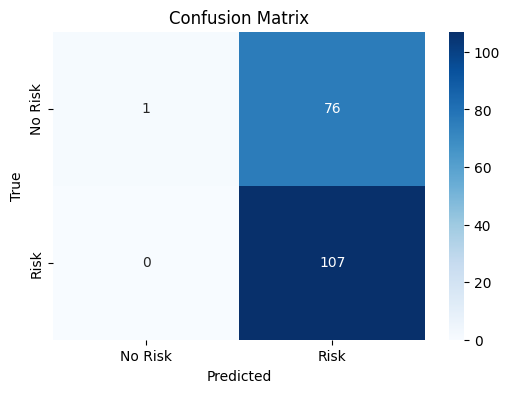

In [37]:
# Predict on the test set
y_pred = best_svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Save Model and Encoders

In [28]:
# Save trained model
dump(model_svm, "trained_svm_model.pkl")

# Save StandardScaler
dump(sc, "scaler.pkl")

# Save label encoders
dump(le1, "le_sex.pkl")
dump(le2, "le_chest_pain.pkl")
dump(le6, "le_resting_ecg.pkl")
dump(le8, "le_exercise_angina.pkl")
dump(le10, "le_st_slope.pkl")

print("Model, scaler, and encoders saved successfully!")


Model, scaler, and encoders saved successfully!


# Single Prediction

Age=50, Sex=0(F), Chest_pain=0(ASY), RestingBP=105, Cholesterol=250, FastingBS=1, RestingECG=2(ST), MaxHR=175, ExerciseAngina=1(Y), OldPeak=1.9, ST_Slope=0(Down)

In [27]:
result = model_svm.predict(sc.transform([[50,0,0,105,250,1,2,175,1,1.9,0]]))

if result ==[0]:
    print("No heart disease!")
else:
    print("Heart disease!")


Heart disease!


------------------------------------------------------------- END -----------------------------------------------------------------